In [1]:
import requests
import json
import html
import pandas as pd
import time
import re



C:\Users\Karina\miniconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.2) or chardet (3.0.4)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


In [2]:
years = ['2021', '2022', '2023', '2024']
races = ['TOR330', 'TOR450']

## Looping through scraped data from 100X100trail

In [ ]:

TOR330_dict = {}
TOR450_dict = {}
races = ['TOR330','TOR450']
years = ['2024']

for race in races:
    for year in years:
        df = pd.read_excel(f'{race} Data/100x100trail/aid_station_{race}_{year}.xlsx')

        # reading time column as a date time 
        df['Time'] = pd.to_datetime(df['Time'])

        # Store the DataFrame in the dictionary with a key like 'TOR330_2021'
        if race == 'TOR330':
            TOR330_dict[f'{race}_{year}'] = df
        else:
            TOR450_dict[f'{race}_{year}'] = df

        print(f"Data read from f'{race}_{year}.xlsx'")


In [ ]:
# Append using pd.concat
TOR450_df = pd.concat(TOR450_dict)

# Append using pd.concat
TOR330_df = pd.concat(TOR330_dict)

### Reading in TORX dates extracted from DUV

In [ ]:
file = f'Database Data/TORX_duv_dates_df.xlsx'
dates_duv_df = pd.read_excel(file)

# Drop the intermediate columns if they're no longer needed
dates_duv_df = dates_duv_df.drop(columns=['Day_of_Week Start_Date'])    

### Adding dates into TRO330 and TOR4450

In [ ]:
TOR450_df['Year'] = TOR450_df['Year'].astype('str')
dates_duv_df['Year'] = dates_duv_df['Year'].astype('str')

# Merging on two columns: 'Race' and 'Year'
TOR450_merged_df = pd.merge(TOR450_df, dates_duv_df, on=['Race', 'Year'], how='inner')

# have I dropped any rows?
print(TOR450_merged_df.shape)
print(merged_df.shape)

checking_PETTORALI = TOR450_merged_df[TOR450_merged_df['Aid Staton'] == 'PETTORALI']

print(checking_PETTORALI['Aid Staton'].unique())
print(checking_PETTORALI['Place'].unique())

TOR450_merged_df = TOR450_merged_df[TOR450_merged_df['Aid Staton'] != 'PETTORALI']
print(TOR450_merged_df.shape)

In [ ]:
TOR330_df['Year'] = TOR330_df['Year'].astype('str')
dates_duv_df['Year'] = dates_duv_df['Year'].astype('str')

# Merging on two columns: 'Race' and 'Year'
TOR330_merged_df = pd.merge(TOR330_df, dates_duv_df, on=['Race', 'Year'], how='inner')

# have I dropped any rows?
print(TOR330_merged_df.shape)
print(merged_df.shape)

print(checking_PETTORALI['Aid Staton'].unique())
print(checking_PETTORALI['Place'].unique())

# TOR330_merged_df = TOR330_merged_df[TOR450_merged_df['Aid Staton'] != 'PETTORALI']
print(TOR330_merged_df.shape)

In [ ]:
TOR330_merged_df

### Extacting TOR330 Aid Station in correct order

In [ ]:
TOR330_2017_aid_station_df = aid_station_TORX_df[f'TOR330_2021']
TOR330_2017_Paul_Tierney_df = TOR330_2017_aid_station_df[TOR330_2017_aid_station_df['Name'] == 'Colle Franco']

TOR330_aid_station_list= list(TOR330_2017_Paul_Tierney_df['Place'].unique())
TOR330_aid_station_list = reversed(TOR330_aid_station_list)

for TOR330_aid_station in TOR330_aid_station_list:
    TOR330_aid_station = TOR330_aid_station.split('|')[0].strip()
#     TOR330_aid_station = TOR330_aid_station.split(' - ')[1].strip()
    
    # Apply regex to remove leading digits and spaces
    TOR330_aid_station = re.sub(r'\s*\d+ - ', '', TOR330_aid_station)
    # replacing 'Rif.' with 'Rifugio'
    TOR330_aid_station = re.sub(r'Rif.', 'Rifugio', TOR330_aid_station)         
    # replacing 'Biv.' with 'Bivacco'
    TOR330_aid_station = re.sub(r'Biv.', 'Bivacco', TOR330_aid_station)
    print(TOR330_aid_station)

### Extacting TOR450 Aid Station in correct order

In [ ]:
TOR450_2023_aid_station_df = aid_station_TORX_df[f'TOR450_2023']
TOR450_2023_Paul_Tierney_df = TOR450_2023_aid_station_df[TOR450_2023_aid_station_df['Name'] == 'Tierney Paul']

TOR450_aid_station_list= list(TOR450_2023_Paul_Tierney_df['Aid Staton'].unique())
TOR450_aid_station_list = reversed(TOR450_aid_station_list)

for TOR450_aid_station in TOR450_aid_station_list:
    print(TOR450_aid_station)

#### Extracting Place of retirement

In [ ]:
df[df['Place'].str.contains('RITIRO')]

In [ ]:
retired_df = df[df['Place'].str.contains('RITIRO')]

retired_df['Retired1'] =  retired_df['Place'].str.split('RITIRO').str.get(-1)

# retired_df['Place'].str.extract(r'RITIRO')
retired_df

### Reading in TOR330 Data on elevation / distance

A copy of the original 'TOR330 - Downloads.xlsx' and 'TOR450 - Downloads.xlsx' and were changed to reflect the downloaded 100x100trail data 

In [ ]:
TOR330_aid_station_info_df = pd.read_excel('TOR330 Data/TOR330 - Timetable.xlsx', sheet_name = 'Sheet1')

# organising the data in the correct order by 'distance\nfrom START\n(km)'
TOR330_aid_station_info_df = TOR330_aid_station_info_df.sort_values(by ='distance\nfrom START\n(km)')

TOR330_aid_station_info_df = TOR330_aid_station_info_df['100X100trail Aid Stations'].to_list()

TOR330_aid_station_info_df

In [ ]:
# TOR450_aid_station_info_df = pd.read_excel('TOR450 Data/TOR450 - Timetable.xlsx', sheet_name = 'Sheet1')

# # organising the data in the correct order by 'distance\nfrom START\n(km)'
# TOR450_aid_station_info_df = TOR450_aid_station_info_df.sort_values(by ='distance\nfrom START\n(km)')

# TOR450_aid_station_info_df = TOR450_aid_station_info_df['100X100trail Aid Stations'].to_list()

# TOR450_aid_station_info_df

### Start Line Issues

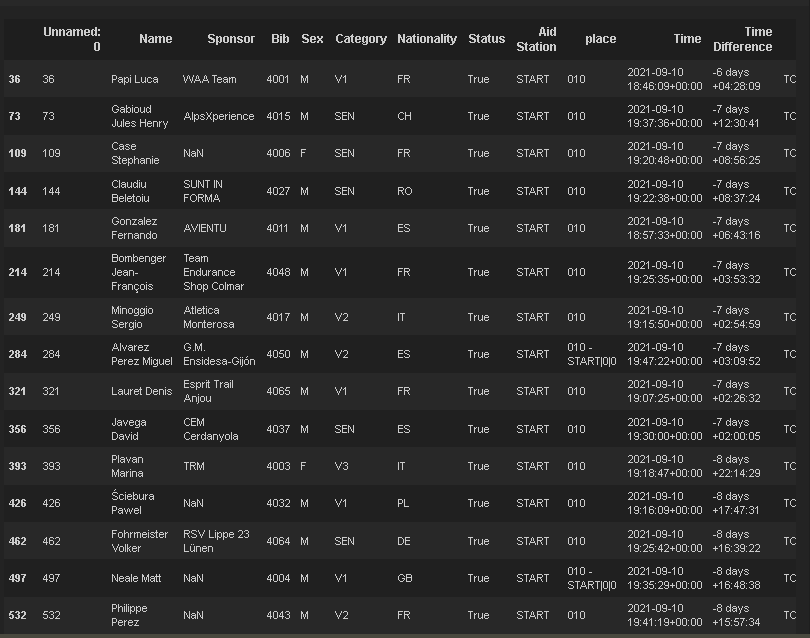

In [ ]:
# print(tor_des_glacier_df[f'tor_des_glacier_2024'])
df = TORX_df[f'TOR330_2024'][TORX_df[f'TOR330_2024']['Aid Station'] == 'START']

df.head(50)